# New Measure - 1kcal/ml sip feeds per 1000 patients

## Rationale
From LPP:
The use of 1kcal/ml sip feeds is of concern due to poor clinical efficacy and cost effectiveness:

- Both powdered ONS (<63g) and 1.5kcal/ml sip feeds are better value
- similar energy density (1kcal/ml) can be achieved by fortifying whole milk

There are significant differences in price between different oral nutrition support products (ONS). Sip feeds can vary significantly in price, energy density (kcal/ml) and pack size, and 1kcal/ml offers the least nutrition at a high cost. 

London wide data shows there are significant differences in prescribing at General Practitioner, Clinical Commissioning Group and Sustainability and Transformation Plan level.

As a result of concern regarding value and that 1kcal/ml sip feeds have been prescribed in error (incorrectly selected from down lists) and duplicate entries, this has been chosen as a key metric.

Please note:
- The items data is based on units to allow for comparison of products in solid (grams) or liquids (ml) and varying pack sizes
- Paediatric products are not included
- All items are ACBS approved and available on prescription
- In a small group of patients that require isotonic feeds (e.g. due to gut resection and malabsorption) these products can be indicated.

## Proposed Measure

### Cost of 1cal/ml sip feeds per 1000 patients

**Title**: Cost of 1cal/ml sip feeds per 1000 patients

**Description**: Cost of 1cal/ml sip feeds per 1000 patients

**Why It Matters**: The use of 1kcal/ml sip feeds is of concern due to poor clinical efficacy and cost effectiveness:
Both powdered ONS (<63g) and 1.5kcal/ml sip feeds are better value
-similar energy density (1kcal/ml) can be achieved by fortifying whole milk
There are significant differences in price between different oral nutrition support products (ONS). Sip
feeds can vary significantly in price, energy density (kcal/ml) and pack size, and 1kcal/ml offers the least
nutrition at a high cost.

### Numerators and Denominators

Numerator:

From LPP:

| bnf_code        | bnf_name                             |
|-----------------|--------------------------------------|
| 090402000BBNNA0 | Fresubin Orig_Drink (5 Flav)         |
| 090402000BBLTA0 | Nutricomp_Stnd Liq (5 Flav)          |
| 090402000BBLCA0 | Nutricomp_Stnd + Fibre Liq (Neutral) |
| 090402000BBKEA0 | Clinutren ISO_Liq (Vanilla)          |
| 090402000BBKDA0 | Clinutren ISO_Liq (Sbery-Rasp)       |
| 090402000BBKCA0 | Clinutren ISO_Liq (Coffee)           |
| 090402000BBKBA0 | Clinutren ISO_Liq (Choc)             |
| 090402000BBHZA0 | Clinutren ISO_Liq (Flav)             |
| 090402000BBFAA0 | Ensure_Liq Feed Mushroom             |
| 090402000BBEZA0 | Ensure_Liq Feed Chicken              |
| 090402000BBEXA0 | Ensure_Liq Feed Choc                 |
| 090402000BBEUA0 | Ensure_Liq Feed (3 Flav)             |
| 090402000BBETA0 | Ensure_Liq Feed Egg Nogg             |
| 090402000BBESA0 | Ensure_Liq Feed Coffee               |
| 090402000BBERA0 | Ensure_Liq Feed Nut                  |
| 090402000BBEPA0 | Ensure_Liq Feed Asparagus            |
| 090402000BBAVA0 | Fresubin Orig_Liq (Flav)             |
| 090402000BBAUA0 | Fresubin_Nut,Peach & Vanilla Liq     |
| 090402000BBATA0 | Fresubin_Vanilla Liq                 |
| 090401000BBBGA0 | Clinutrin 1.0_Liq Diet               |

Denominator: patient list size



## SQL and results

In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [2]:
#obtain 1kcal/ml data per 1000 patients

sql = """
SELECT
  rx.month,
  rx.pct,
  SUM(rx.items) as items, --calculate total rx items
  SUM(rx.actual_cost) as actual_cost  --calculated total actual_cost
FROM
  hscic.normalised_prescribing_standard AS rx
WHERE
  rx.bnf_code IN 
('090402000BBNNA0', --Fresubin Orig_Drink (5 Flav)
'090402000BBLTA0', --Nutricomp_Stnd Liq (5 Flav)
'090402000BBLCA0', --Nutricomp_Stnd + Fibre Liq (Neutral)
'090402000BBKEA0', --Clinutren ISO_Liq (Vanilla)
'090402000BBKDA0', --Clinutren ISO_Liq (Sbery-Rasp)
'090402000BBKCA0', --Clinutren ISO_Liq (Coffee)
'090402000BBKBA0', --Clinutren ISO_Liq (Choc)
'090402000BBHZA0', --Clinutren ISO_Liq (Flav)
'090402000BBFAA0', --Ensure_Liq Feed Mushroom
'090402000BBEZA0', --Ensure_Liq Feed Chicken
'090402000BBEXA0', --Ensure_Liq Feed Choc
'090402000BBEUA0', --Ensure_Liq Feed (3 Flav)
'090402000BBETA0', --Ensure_Liq Feed Egg Nogg
'090402000BBESA0', --Ensure_Liq Feed Coffee
'090402000BBERA0', --Ensure_Liq Feed Nut
'090402000BBEPA0', --Ensure_Liq Feed Asparagus
'090402000BBAVA0', --Fresubin Orig_Liq (Flav)
'090402000BBAUA0', --Fresubin_Nut,Peach & Vanilla Liq
'090402000BBATA0', --Fresubin_Vanilla Liq
'090401000BBBGA0') --Clinutrin 1.0_Liq Diet
GROUP BY
  month,
  pct
ORDER BY
  month
"""
kcal_df = bq.cached_read(sql, csv_path='kcal_df.csv', use_cache=False)
kcal_df['month'] = kcal_df['month'].astype('datetime64[ns]')


C:\Users\racro\Anaconda3\lib\site-packages\pandas\io\gbq.py:108: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  **kwargs)


## Costs of 1kcal/ml prescribing

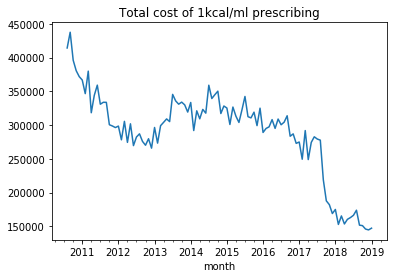

In [3]:
kcal_df.groupby("month")['actual_cost'].sum().plot(kind='line', title="Total cost of 1kcal/ml prescribing")

This shows a considerable decrease, particularly in last 18 months.  *CHECK bnf_codes in case of change*

## Modelling for measure

In [4]:
# get data for patient list size (children aged 0-4)
sql2 = """
SELECT month, pct_id AS pct, sum(total_list_size) as list_size
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct
"""
listsize_df = bq.cached_read(sql2, csv_path='list_size.csv')
listsize_df['month'] = listsize_df['month'].astype('datetime64[ns]')

In [5]:
#merge dataframes

per_1000_df = pd.merge(kcal_df, listsize_df, on=['month', 'pct'])
per_1000_df['cost_per_1000'] = 1000* (per_1000_df['actual_cost']/per_1000_df['list_size'])

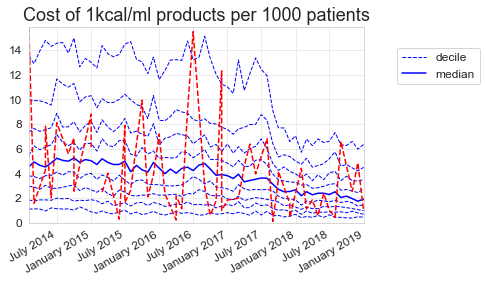

In [6]:
#create sample deciles

charts.deciles_chart(
        per_1000_df,
        period_column='month',
        column='cost_per_1000',
        title="Cost of 1kcal/ml products per 1000 patients",
        show_outer_percentiles=False)

#add in example CCG (NEW Devon - 99P)
df_subject = per_1000_df.loc[kcal_df['pct'] == '99P']
plt.plot(df_subject['month'], df_subject['cost_per_1000'], 'r--')
plt.show()

There is significant use in some CCGs.

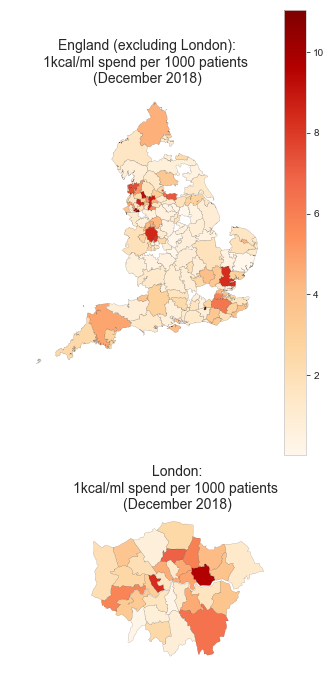

In [7]:
#create choropeth map of 1kcal/ml per 1000 patients
latest_per_1000_df = per_1000_df.loc[per_1000_df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_per_1000_df, title="1kcal/ml spend per 1000 patients \n(December 2018)", column='cost_per_1000', cartogram=False, separate_london=True)
plt.show()